## CS4168 Data Mining Final Project - Group 09

## 2a. Student Names : 

#### Chandan Kumar Chandan 19151675 - 25% (Collaborated in all sections)
####  Gowrish Shenoy  19113323 - 25% (Collaborated in all sections)
#### Xiaoda Liu 19021798  - 25% (Collaborated in all sections)
#### Yashaswy Alubaka 19132301  - 25% (Collaborated in all sections)
    

## Summary
In this notebook, we aim at Classification of Mushroom Dataset and predict if the Mushrooms are “Poisonous or not”. We explored various classifier algorithms and examined its parameters to fine tune the model with cross validation to predict the same. As a first step, we load the data,analysed, used few charts to visualize the data. As a next step we  used K-Means Clustering where the best K value was determined using the elbow method. Since our output is to predict if the Mushrooms are “Poisonous or not” we considered- A Poisonous mushroom gets a 1 (true), and an Edible mushroom gets a 0 (false). We categorise this problem as a classification model. Hence, we have chosen dimensionality reduction using PCA and the classifiers solving this problem. We begin with K neighbors Classifier, and then moved to Random Forest, Gradient Boosting, ADA Boost and Decision Tree and best model was selected.
 

In [60]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support, f1_score
from scipy import interp
import pickle

import seaborn as sns
sns.set(style="whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

After importing the module libraries, the next step is to load our dataset into a Pandas dataframe.
Here we have choosen Mushrooms (sample) dataset to perform the Task: Predict attribute class (classification) 
Source: https://archive.ics.uci.edu/ml/datasets/mushroom
Dataframe is the term used in Pandas for two-dimensional arrays.

In [2]:
df = pd.read_csv('mushrooms_sample.csv')

Original_df = df

# 2b.i - Exploratory Data Analysis

In the Exploratory Data Analysis (EDA) part, we print a statistical summary for all numerical attributes and plot a number of graphs whose content about the qualities of mushroom-based on different characteristics like edible or poisonous and details on cap-*(shape, color, surface )attributes. After that, we encode all attributes(where class use poisonous:1, edible :0) and further examine the pairwise distribution between 'cap-shape,' 'cap-surface,' 'cap-color,' 'habitat' a pair plot. We found that the number of edible mushrooms is equal to the poisonous. For the shape of a mushroom analysis, knobbed mushrooms are poisonous. For color analysis, purple, black, and green mushrooms are toxic. For the surface analysis of mushrooms, the mushrooms in the data were not of grooves type. we check for missing values, which found attribute  (stalk-root) missing value 1230. Then we covert any NaN to string as the same category. We also look at boxplot, regplot, violinplot, and stripplot to understand the distribution better. From the analysis, we quickly find out not exist outliers/extreme values in most of the attributes but in veil-type, ring-number,stalk-root, etc. In the study of mushroom shapes, it was found that only a small number of mushrooms were conical, and the distribution was not uniform for other shapes.

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [3]:
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,t,n,f,c,b,u,t,...,p,g,p,w,o,p,k,v,d,e
1,f,y,g,t,n,f,c,b,u,t,...,w,g,p,w,o,p,k,v,d,e
2,x,s,p,t,n,f,c,b,w,e,...,w,e,p,w,t,e,w,c,w,e
3,b,s,w,f,n,f,w,b,g,e,...,w,w,p,w,t,p,w,n,g,e
4,f,y,e,t,n,f,c,b,w,t,...,p,p,p,w,o,p,n,v,d,e


In [4]:
df.tail(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3995,f,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,p,p
3996,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,g,p
3997,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,m,p
3998,f,y,e,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,l,p
3999,f,s,n,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p


We can see that the dataset has 4000 data rows, and all are categorical attributes. The data rows are typically called *observations* or *examples*, and the columns are also called *attributes* or *features*.

The last attribute `class` indicates whether a mushroom is Poisonous (p) or Edible (e). This attribute would be a primary candidate for an attribute to *learn* to predict from the values of the other attributes. Before building a predictive model, though, the first step is to get to know the dataset better (the goal of this exercise) and prepare it for machine learning (the goal of the next exercise).

All the columns in the dataset

In [5]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

Data set details such as name and datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
cap-shape                   4000 non-null object
cap-surface                 4000 non-null object
cap-color                   4000 non-null object
bruises%3F                  4000 non-null object
odor                        4000 non-null object
gill-attachment             4000 non-null object
gill-spacing                4000 non-null object
gill-size                   4000 non-null object
gill-color                  4000 non-null object
stalk-shape                 4000 non-null object
stalk-root                  2770 non-null object
stalk-surface-above-ring    4000 non-null object
stalk-surface-below-ring    4000 non-null object
stalk-color-above-ring      4000 non-null object
stalk-color-below-ring      4000 non-null object
veil-type                   4000 non-null object
veil-color                  4000 non-null object
ring-number                 4000 non-null object
ring-type  

#### Attribute Information:
Source: https://archive.ics.uci.edu/ml/datasets/mushroom
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

We now check for any Missing values

In [7]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

We see that there are 1230 missing values in stalk-root. Hence we convert them to a string and considering them as same category

In [8]:
#Convert any NaN to string as a same category
df = df.replace(np.nan, '', regex=True)

In [9]:
#shape of the dataset
df.shape

(4000, 23)

Statistical summary for all attributes

In [10]:
df.describe().T

,count,unique,top,freq
cap-shape,4000,6,x,1758
cap-surface,4000,4,y,1620
cap-color,4000,10,n,1154
bruises%3F,4000,2,f,2334
odor,4000,9,n,1692
gill-attachment,4000,2,f,3901
gill-spacing,4000,2,c,3384
gill-size,4000,2,b,2724
gill-color,4000,12,b,870
stalk-shape,4000,2,t,2250


Here we check the distribution of `class` in our dataset

In [11]:
print(df.groupby('class').size())

class
e    2000
p    2000
dtype: int64


The dataset contains 2000 enteries of Poisonous (p) or Edible (e)

### Qualities of Mushroom based on its Ediblity 

In this section we try to find the relations between different columns of our dataset based on its ediblity. Red idicates the mushrooms are Poisonous and Green inicates its Edible.

In [12]:
def plot_col(col, hue=None, color=['red', 'green'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=df, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

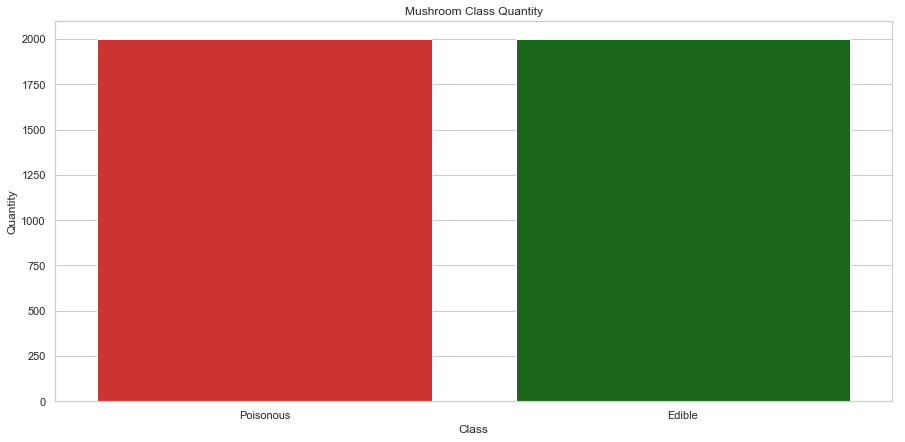

In [13]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

Number of mushrooms for each cap categorize.

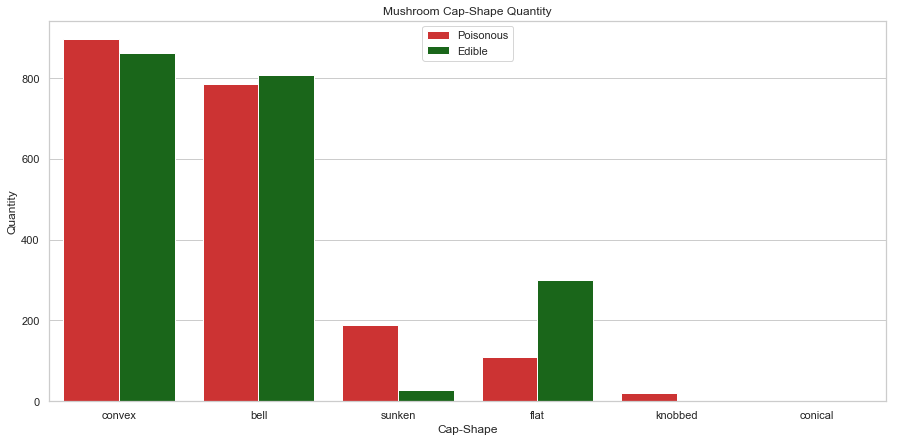

In [14]:
#number of mushrooms for each cap categorize.
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

The number of edible and poisonous mushrooms are abundant in Convex & bell shaped. There are no conical shaped mushrooms in the data. All knobbed shapes of mushrooms are poisonous. Sunken shaped mushroom toxicness is significantly greater than the number of edible mushrooms. For flat mushrooms, however, its opposite.

Number of Mushrooms based on Cap-Surface Quality

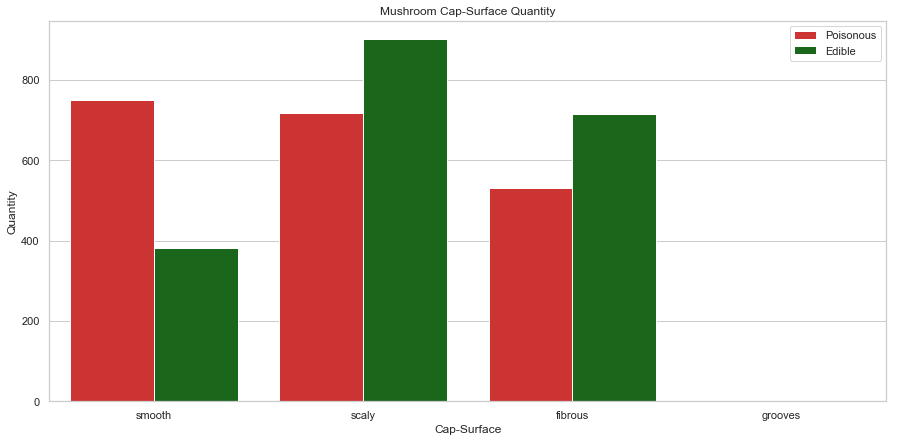

In [15]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

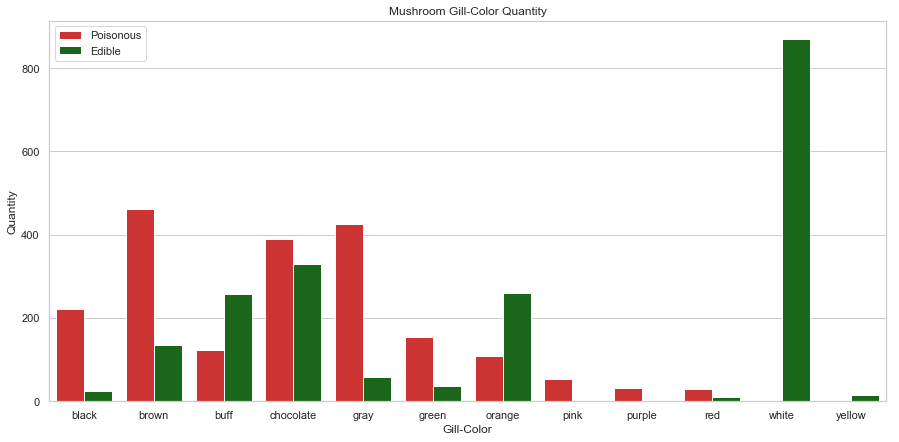

In [16]:
surface_dict = {"black":"k","brown":"n","buff":"b","chocolate":"h","gray":"g", "green":"r","orange":"o","pink":"p","purple":"u","red":"e", "white":"w","yellow":"y"}
plot_col(col='gill-color', hue='class', labels=surface_dict)

Number of Mushrooms based on Cap-color Quality

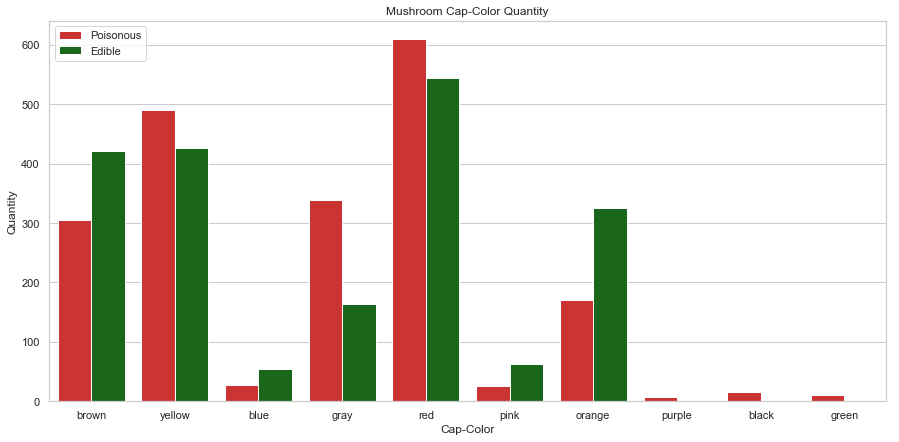

In [17]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', hue='class', labels=color_dict)

For the analysis of mushroom color, it is obvious that purple, black and green mushrooms are poisonous. Red mushrooms were the most abundant, both edible and poisonous, and there were more poisonous red mushrooms than edible ones. In contrast, blue and pink mushrooms were relatively rare, with more edible mushrooms than poisonous ones.  Brown and yellow mushrooms were second in number, with the former having significantly more edible mushrooms than poisonous ones and the latter having more poisonous mushrooms than edible ones. For the grey and orange mushrooms, there was a significant difference, with twice as many poisonous grey mushrooms as edible ones and twice as many edible orange mushrooms as poisonous ones.

### Process and encoding

As all the values of our dataset is categorical we use a LabelEncoder from sklearn to encode all our data to numerical values

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
    
    
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,0,2,1,5,1,0,0,9,1,...,6,3,0,2,1,4,2,4,0,0
1,2,3,3,1,5,1,0,0,9,1,...,7,3,0,2,1,4,2,4,0,0
2,5,2,5,1,5,1,0,0,10,0,...,7,2,0,2,2,0,7,1,6,0
3,0,2,8,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,2,1,0
4,2,3,2,1,5,1,0,0,10,1,...,6,6,0,2,1,4,3,4,0,0


We see that the LabelEncoder has encoded all the values.
Upon encoding the Poisonous is represented by 1 and Edible is represented by 0. 

Now, we can think of our classifier as “Poisonous or not”. 

A Poisonous mushroom gets a 1 (true), and an Edible mushroom gets a 0 (false).

Statistical summary for all numerical attributes after encoding

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-shape,4000.0,3.32250,1.595973,0.0,2.0,3.0,5.0,5.0
cap-surface,4000.0,1.83900,1.229210,0.0,0.0,2.0,3.0,3.0
cap-color,4000.0,4.45850,2.507658,0.0,3.0,4.0,7.0,9.0
bruises%3F,4000.0,0.41650,0.493040,0.0,0.0,0.0,1.0,1.0
odor,4000.0,4.13500,2.111727,0.0,2.0,5.0,5.0,8.0
gill-attachment,4000.0,0.97525,0.155382,0.0,1.0,1.0,1.0,1.0
gill-spacing,4000.0,0.15400,0.360994,0.0,0.0,0.0,0.0,1.0
gill-size,4000.0,0.31900,0.466147,0.0,0.0,0.0,1.0,1.0
gill-color,4000.0,4.77525,3.566850,0.0,2.0,5.0,7.0,11.0
stalk-shape,4000.0,0.56250,0.496140,0.0,0.0,1.0,1.0,1.0


We can further examine the pairwise distribution between `cap-shape`, `cap-surface`, `cap-color` and `habitat` a **pair plot**.

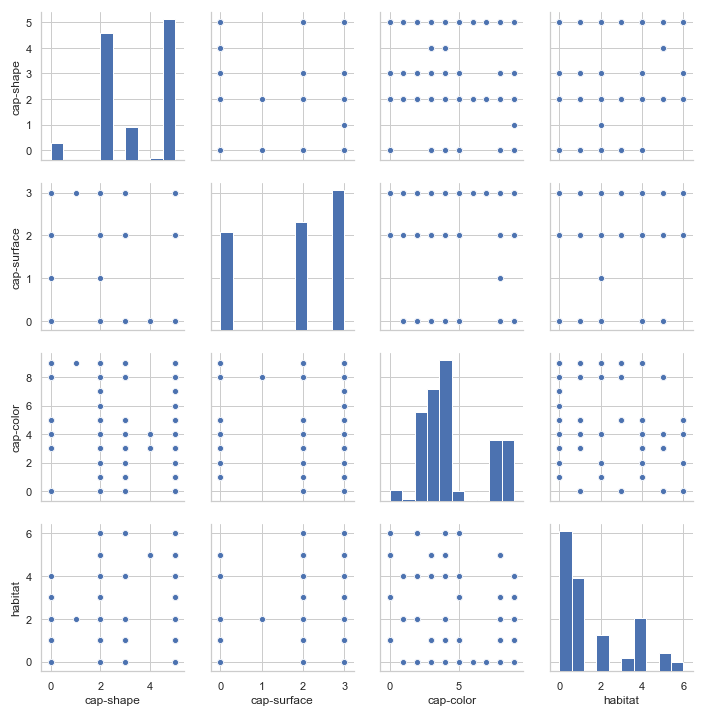

In [20]:
sns.pairplot(data=df[['cap-shape','cap-surface','cap-color','habitat']].dropna())
plt.show()

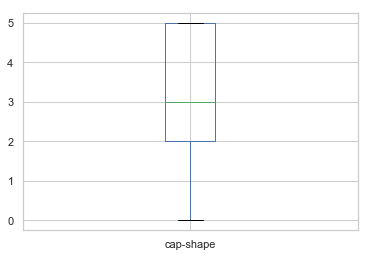

In [21]:
df.boxplot(column='cap-shape')
plt.show()

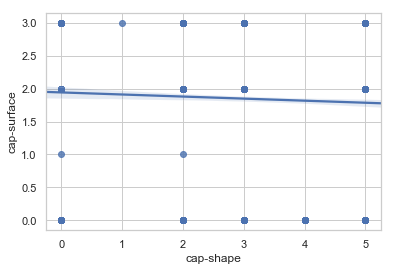

In [22]:
sns.regplot(data=df, x='cap-shape', y='cap-surface')
plt.show()

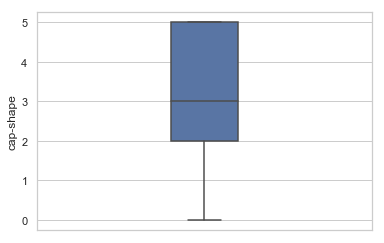

In [23]:

sns.boxplot(x=df['cap-shape'], orient='v', width=0.2)
plt.show()

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to box plots.

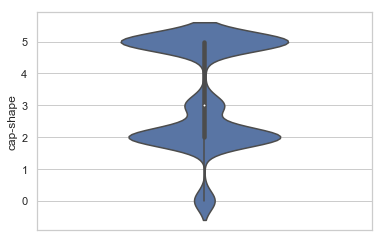

In [24]:
sns.violinplot(x=df['cap-shape'], orient='v', width=0.5)
plt.show()

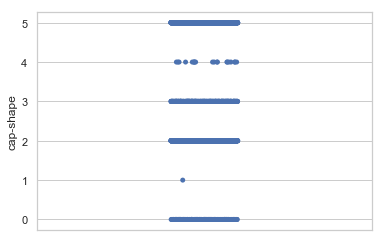

In [25]:
sns.stripplot(x=df['cap-shape'], jitter=True, orient='v')
plt.show()

Plot pairwise relationships in a mushrooms for each stalk categorize.

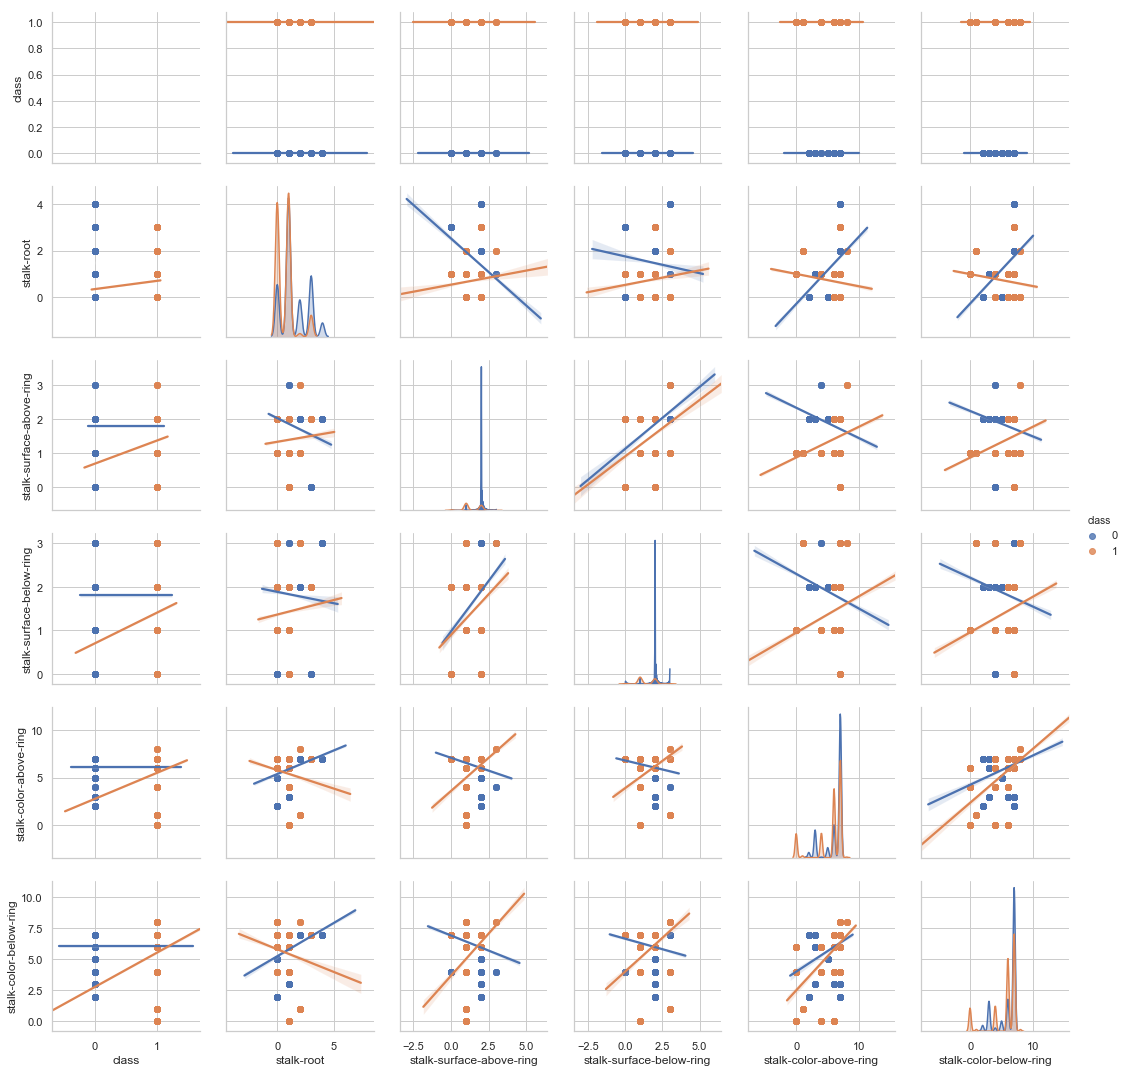

In [26]:
stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
              'stalk-color-above-ring', 'stalk-color-below-ring']
data_cats = df[stalk_cats]
sns.pairplot(data_cats, hue='class', kind='reg')

Visualize the distribution in a mushrooms for each stalk categorize and determining the mean of each feature.

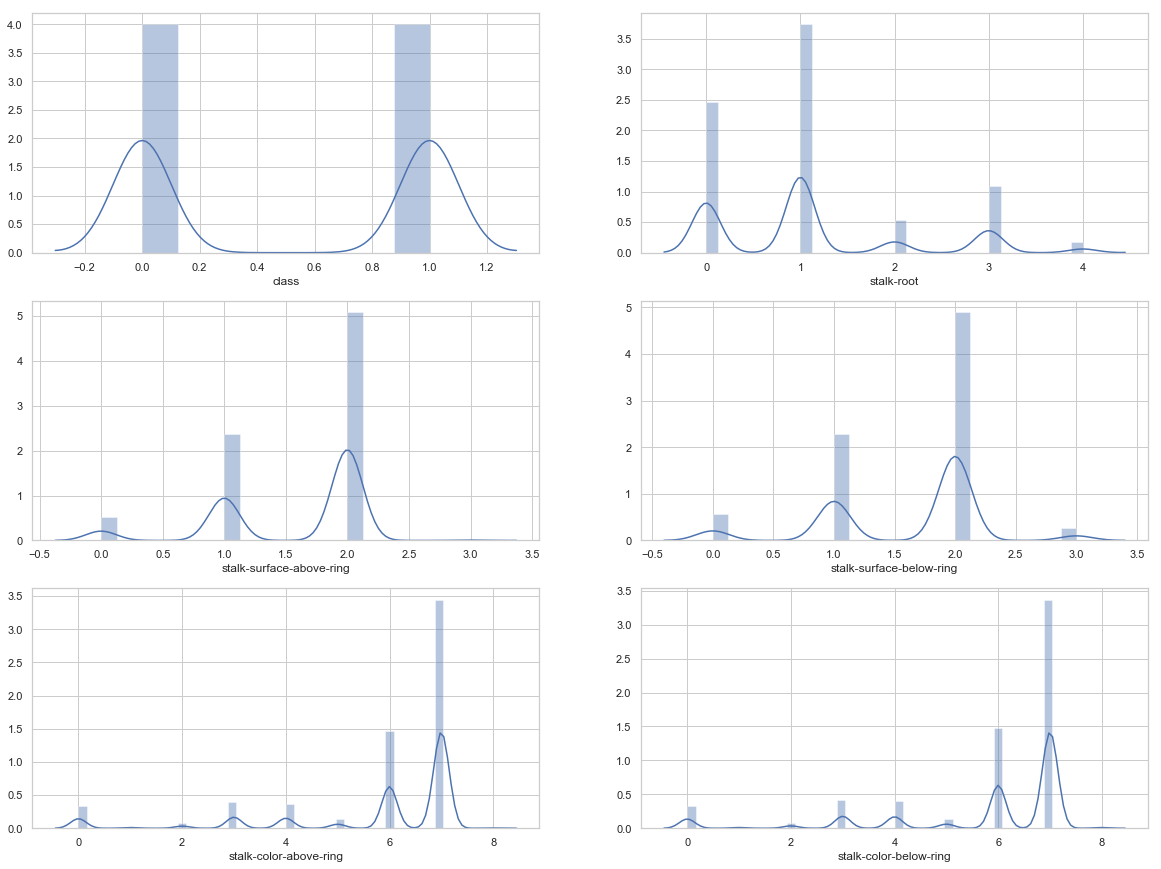

In [27]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, axis in enumerate(ax.flat):
    sns.distplot(data_cats.iloc[:, i], ax=axis)

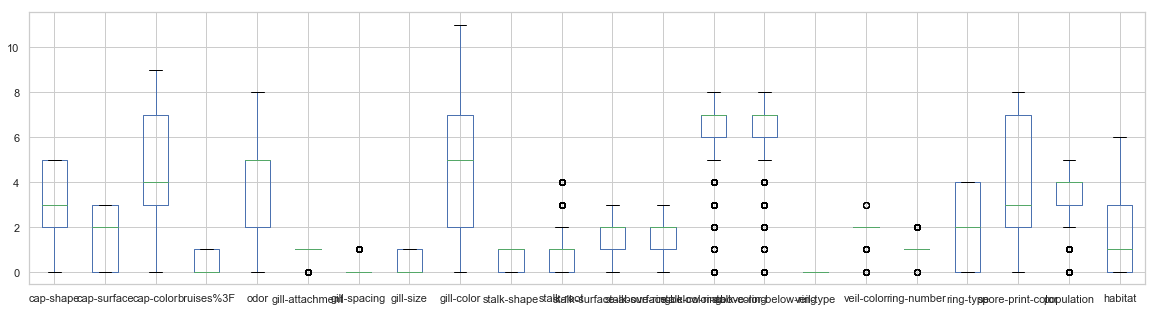

In [28]:
#check for outliers

df.loc[:,'cap-shape':'habitat'].boxplot(figsize=(20,5))
plt.show()

Many ML algorithms assume that all numerical features are on the same scale. Standard techniques in the Python module `scikit-learn` for achieving this are:
* MinMaxScaler - rescales a column to the interval [0,1]

### Scaling

In [29]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(df)

## 2b. ii  - K-Means Clustering

In Clustering Algorithm part, we first calculated the best value of K using the Elbow method. We tried the clustering with two values of K = 3. First we applied manifold-learning technique to project the data set to a 2D space and applied multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space and finally applied t-SNE to project both the data and the k-Means cluster centers to a 2D space.

He we use
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot


In [30]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### Elbow method to identify the best value of K

In [32]:
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

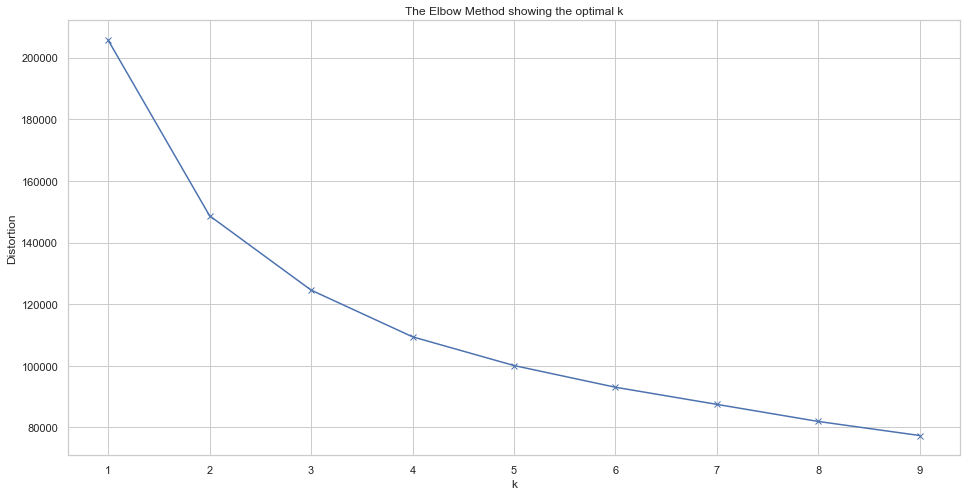

In [33]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Number of clusters $k$.

In [34]:
k = 3

Run k-Means

In [35]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df)

### Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

In [36]:
# append the cluster centers to the dataset
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [37]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


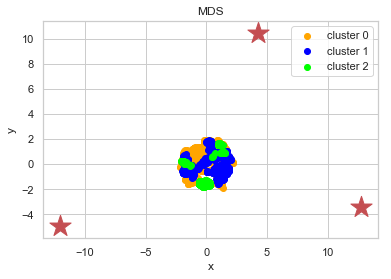

In [38]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [39]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


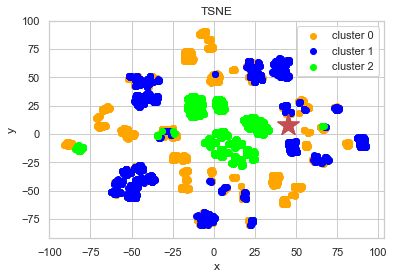

In [40]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [41]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [42]:
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cluster
0,5,0,2,1,5,1,0,0,9,1,...,3,0,2,1,4,2,4,0,0,0
1,2,3,3,1,5,1,0,0,9,1,...,3,0,2,1,4,2,4,0,0,0
2,5,2,5,1,5,1,0,0,10,0,...,2,0,2,2,0,7,1,6,0,0
3,0,2,8,0,5,1,1,0,2,0,...,7,0,2,2,4,7,2,1,0,1
4,2,3,2,1,5,1,0,0,10,1,...,6,0,2,1,4,3,4,0,0,0


In [43]:
df.tail(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cluster
3995,2,3,2,0,8,1,0,1,0,1,...,6,0,2,1,0,7,4,4,1,2
3996,2,2,8,1,5,1,0,0,10,0,...,7,0,2,2,4,5,4,1,1,0
3997,2,2,8,1,5,1,0,0,10,0,...,7,0,2,2,4,5,4,3,1,0
3998,2,3,2,0,7,1,0,1,0,1,...,6,0,2,1,0,7,4,2,1,2
3999,2,2,4,0,8,1,0,1,0,1,...,7,0,2,1,0,7,4,0,1,2


In [44]:
df.groupby('cluster').mean().T

cluster,0,1,2
cap-shape,3.293984,3.380915,3.296101
cap-surface,1.666856,1.605896,2.475237
cap-color,3.748581,6.496509,3.008430
bruises%3F,0.703178,0.285493,0.062171
odor,4.306470,2.844841,5.569020
gill-attachment,0.944949,0.998448,1.000000
gill-spacing,0.132236,0.281614,0.021075
gill-size,0.148695,0.111715,0.916754
gill-color,8.027242,3.764934,0.109589
stalk-shape,0.570942,0.290147,0.916754


#### Analysis

By looking at the table above we can conclude that:
* Cluster 0 - based on the class value we see that this cluster tends have more number of edible mushrooms. The grill-color has the highest mean and second being stalk-color-above-ring being more influencer. 

* Cluster 1 - This cluster has both edible and poisonous mushrooms in same propotions.

* Cluster 2 - based on the class value we see that this cluster has more poisnous mushrooms.

* Cap shaped & veil-color are almost same in all the three clusters indicating less importance during classification. 

* Veil-types has no significance in the classification of Mushroom.

* Grill-color follow the liner function i.e. the number very high idicates high number edible mushrooms.



In [45]:
df.to_csv('Mushroom_processed_data.csv',index=False)

## 2c. Predictive modelling

In the Predictive Modelling part, we attempted  training K Neighbors, Random Forest, Gradient Boosting, ADA Boost and Decision Tree classifiers. First, we identified the outliers in our dataset and treated the outliers with log transformation followed by scaling with RobustScaler and for non-outliers we used StandardScaler. Next, we split the dataset into Train and Test randomly with 80:20 ratio. Next, we train each classifier with the training set and a range of possible parameters in order to find the best parameters for each model by cross-validation. To do this we will build another pipeline which includes the preprocessing pipeline, dimensionality reduction using PCA and the classifiers. The pipeline took care for separately preprocessing the training and validation sets after the training set is further split into training and testing sets in the process of cross-validation. Next we evaluated the models on the test data set and compared various metrics like accuracy, precisions, recall, F1-Score, TPR (True Postive rate) and AUC (Area under the ROC curve). We  also examined the ROC curves of the classifiers.

We will attempt training K Neighbors,Random Forest, Gradient Boosting, ADA Boost and Decision Tree classifiers. We will tune their parameters, compare them and choose the best classifier for our problem. Here we will prepare a scikit-learn pipeline for data preparation (preprocessing pipeline), which we will apply later. The use of his pipelines ensures that preprocessing is applied separately to any training validation and test dataset without data leakage.

First, we need to prepare two lists of column names. The list `names_outliers` contains the names of the two columns to which we will apply log transformation followed by RobustScaler. The list `names_no_outliers` contains the names of all other predictor columns to which we will apply StandardScaler.

In [46]:
# also store a list with the names of all predictors
names_all = [c for c in df if c not in ['class']]

# define column groups with same data preparation
names_outliers = ['gill-attachment','gill-spacing','stalk-root','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','population']
names_no_outliers = list(set(names_all) - set(names_outliers))

After splitting a dataset into a training and test datasets, the names of the columns are lost. This is the reason, we stored the names of the columns in lists above. We will use the following class in the preprocessing pipeline to put the names of the columns back. We need this to easily apply the different preparation strategies to the two groups of columns. 

In [47]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

Then we need another class to be able to select a particular group of columns.

In [48]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

Finally, we can build the preprocessing pipeline. It first adds the column names back to a set of examples (that can be either a training, or a validation, or test set). Then it applies the two different data preparation strategies to the two groups of columns and unites them with FeatureUnion. 

In [49]:
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log1p, validate=True), # else need to use sin or cos
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_no_outliers),
            StandardScaler()
        ))
    ])
)

Now we can separate the columns into *target* and *predictors* and split the dataset into a training and test sets. 

In [50]:
#Spliting test and train

y = df['class']
X = df.drop('class', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

The parameter `stratify=y` ensures both classes are represented in the same proportion in both the training and the test sets.

Note that after the split into a training and test sets, X_train and X_test are numpy arrays and no longer have column names. That's why we needed the class above to put the names of columns back in the preprocessing pipeline.

In [51]:
X_train.shape

(3200, 23)

In [52]:
y_train.shape

(3200,)

In [53]:
X_test.shape

(800, 23)

In [54]:
y_test.shape

(800,)

# Grid Search for Best Parameters of Classifiers

Next, we train an K Neighbors classifier with the training set and a range of possible parameters in order to find the best parameters for K Neighbors classifier by cross-validation. To do this we will build another pipeline which includes the preprocessing pipeline, dimensionality reduction using PCA and the K Neighbors classifier. The pipeline will take care for separately preprocessing the training and validation sets after the training set is further split into training and validation sets in the process of cross-validation.

## K Neighbors Classifier

In [62]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),('reduce_dim', PCA(n_components=2, svd_solver='arpack')), ('knc', KNeighborsClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline


param_grid = {
    'knc__n_neighbors': [3,5,7,9],
    'knc__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    }

search = GridSearchCV(pipe, param_grid, cv=2, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
KNC_best_params = search.best_params_
KNC_best_model = search.best_estimator_

Best CV score = 0.875:
Best parameters:  {'knc__algorithm': 'auto', 'knc__n_neighbors': 9}


The parameter `refit=True` makes the GridSearchCV train any  classifier on the **whole training set** with the best parameters found. This final best model can then be accessed via the `.best_estimator_` attribute of the GridSearchCV.

Let's repeat the same experiment but with the Random Forest classifier.

## Random Forest Classifier

In [55]:

# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),('reduce_dim', PCA(n_components=2, svd_solver='arpack')), ('rf', RandomForestClassifier())])


# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of Random Forest and their possible values
param_grid = {
    'rf__n_estimators' : [10,20,30],
    'rf__max_depth': [2, 4, 6, 8]
}

search = GridSearchCV(pipe, param_grid, cv=10, refit=True, scoring = 'roc_auc')
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_
RF_best_score = search.best_score_

Best CV score = 0.953:
Best parameters:  {'rf__max_depth': 8, 'rf__n_estimators': 20}


Let's repeat the same experiment but with the ADA Boost classifier.

## AdaBoost Classifier

In [56]:

# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),('reduce_dim', PCA(n_components=2, svd_solver='arpack')),('abc', AdaBoostClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of Random Forest and their possible values
param_grid = {
    'abc__n_estimators' : [20,50,100],
    'abc__learning_rate': [0.01,0.1,1]
}

search = GridSearchCV(pipe, param_grid, cv=10, refit=True, scoring = 'roc_auc')
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
ABC_best_params = search.best_params_
ABC_best_model = search.best_estimator_
ABC_best_score = search.best_score_

Best CV score = 0.949:
Best parameters:  {'abc__learning_rate': 1, 'abc__n_estimators': 100}


Let's repeat the same experiment but with the Decision Tree classifier.

## Decision Tree Classifier 

In [57]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),('reduce_dim', PCA(n_components=2, svd_solver='arpack')), ('dtc', DecisionTreeClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of Random Forest and their possible values
param_grid = {
    'dtc__criterion' : ['gini', 'entropy'],
    'dtc__max_depth' : [4,6,8,12]
}

search = GridSearchCV(pipe, param_grid, cv=10, refit=True, scoring = 'roc_auc')
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
DTC_best_params = search.best_params_
DTC_best_model = search.best_estimator_
DTC_best_score = search.best_score_

Best CV score = 0.951:
Best parameters:  {'dtc__criterion': 'gini', 'dtc__max_depth': 12}


## Gradient Boosting Classifier

In [59]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),('reduce_dim', PCA(n_components=2, svd_solver='arpack')), ('gbc', GradientBoostingClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of Random Forest and their possible values
param_grid = {
    'gbc__n_estimators' : [20,50,100],
    'gbc__learning_rate': [0.01,0.1,1]
}

search = GridSearchCV(pipe, param_grid, cv=10, refit=True, scoring = 'roc_auc')
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
GBC_best_params = search.best_params_
GBC_best_model = search.best_estimator_
GBC_best_score = search.best_score_

Best CV score = 0.954:
Best parameters:  {'gbc__learning_rate': 0.1, 'gbc__n_estimators': 100}


### Compare Classifiers on Test Set

The evaluation function below evaluates a model on a test data set. The results returned by the function are a variety of metrics measured on the test set which we will use to compare the models and decide which classifier to choose for training the final model. These metrics are:

- accuracy
- precisions
- recall
- F1-score
- TPR (true positive rate)
- AUC (area under the ROC curve)

To plot ROC curves for the models, we need to ensure that the same fpr (false positive rate) scale is used for all curves. For this reason, we take a scale of 100 equally spaced fpr values between 0 and 1.

In [63]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [64]:
# model - a trained binary probabilistic classification model;
#         it is assumed that there are two classes: 0 and 1
#         and the classifier learns to predict probabilities for the examples to belong to class 1

def evaluate_model(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # compute fpr and tpr values for various thresholds 
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)
        
    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([interp(mean_fpr, _fpr, _tpr)])
    
    # compute the area under the curve
    _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc
    #return _accuracy, _precision[0], _f1_score[0],_recall[0]

The function above to evaluate the best models found by the grid search.

In [65]:
KNC_accuracy, KNC_precision, KNC_recall, KNC_f1_score, KNC_tpr, KNC_auc = evaluate_model(X_test, y_test, KNC_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(X_test, y_test, RF_best_model)
GBC_accuracy, GBC_precision, GBC_recall, GBC_f1_score, GBC_tpr, GBC_auc = evaluate_model(X_test, y_test, GBC_best_model)
ABC_accuracy, ABC_precision, ABC_recall, ABC_f1_score, ABC_tpr, ABC_auc = evaluate_model(X_test, y_test, ABC_best_model)
DTC_accuracy, DTC_precision, DTC_recall, DTC_f1_score, DTC_tpr, DTC_auc = evaluate_model(X_test, y_test, DTC_best_model)

We will use a pandas bar plot to compare the accuracies all the models as well as their precision, recall and F1-score for class 1.

### Comparison

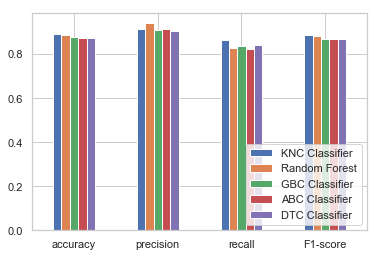

In [66]:
KNC_metrics = np.array([KNC_accuracy, KNC_precision, KNC_recall, KNC_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
GBC_metrics = np.array([GBC_accuracy, GBC_precision, GBC_recall, GBC_f1_score])
ABC_metrics = np.array([ABC_accuracy, ABC_precision, ABC_recall, ABC_f1_score])
DTC_metrics = np.array([DTC_accuracy, DTC_precision, DTC_recall, DTC_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'KNC Classifier': KNC_metrics, 'Random Forest': RF_metrics, 'GBC Classifier': GBC_metrics,'ABC Classifier': ABC_metrics,'DTC Classifier': DTC_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

### ROC curve

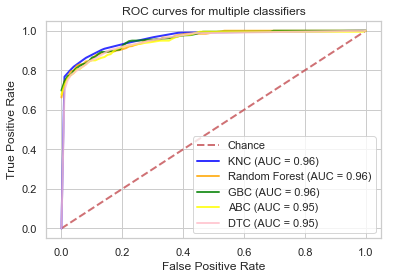

In [69]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(mean_fpr, KNC_tpr[0,:], lw=2, color='blue', label='KNC (AUC = %0.2f)' % (KNC_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, GBC_tpr[0,:], lw=2, color='green', label='GBC (AUC = %0.2f)' % (GBC_auc), alpha=0.8)
plt.plot(mean_fpr, ABC_tpr[0,:], lw=2, color='yellow', label='ABC (AUC = %0.2f)' % (ABC_auc), alpha=0.8)
plt.plot(mean_fpr, DTC_tpr[0,:], lw=2, color='pink', label='DTC (AUC = %0.2f)' % (DTC_auc), alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

### Random Forest Model 

In [70]:
# function to remove the string 'rf__' from the names of the parameters in RF_best_params
def transform(dict):
    return {key.replace('rf__','') :  value for key, value in dict.items()}

pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier(**transform(RF_best_params)))])

final_model_RF =pipe.fit(X, y)

In [71]:
filename = 'final_model_RF.sav'
pickle.dump(final_model_RF, open(filename, 'wb'))
print("Done")

Done


## Conculsion

Based on the model comparision we see that Random Forest has got the highest accuracy and precision value compared to the other classifiers. Also, F1 score for the random forest is also high as F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy.

We believe that we have used the concepts learned from this module and achieved the best algorithm with a good accuracy and cv score to identify if the Mushrooms are “Poisonous or not” exploring and analysing most machine learning techniques and features.